In [11]:
import numpy as np
csv_path = "mtfuji_data.csv" # Specify the file name (path)
np.set_printoptions(suppress=True) # Set prohibition of index display
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
#print(fuji[:,0])

# Problem 1. Visualisation

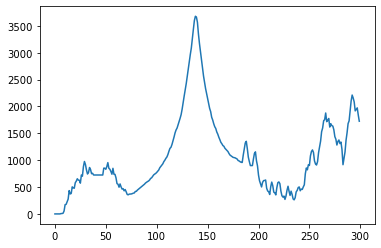

In [13]:
import matplotlib.pyplot as plt
plt.plot(fuji[:,0],fuji[:,3])

# Problem 2. slope function

In [55]:
def compute_grad_point(n): #This function is to calculate
    dx = fuji[n , 0] - fuji[n - 1 , 0]
    dy = fuji[n , 3] - fuji[n - 1 , 3]
    return dy / dx
print(compute_grad(fuji,100))

18.90000000000009


# Problem 3. create a function to create the destination

$$ Destination point = current point - \alpha \times current point gradient$$

In [57]:
def compute_dest(n , alpha):
    return n - alpha * compute_grad_point(n)
print(compute_dest(100, 0.2))

96.21999999999998


# Problem 4. Creating a function to go down mountain

In [65]:
import math

def descending_func(n = 136 , alpha = 0.2):
    pos_n = n
    positions = [pos_n]
    for _ in range(100000):
        pos_n = int(math.floor(compute_dest(pos_n , alpha)))
        if pos_n <= 0:
            pos_n == 0
            positions.append(pos_n)
            return positions
        elif pos_n >= 299:
            pos_n == 299
            positions.append(pos_n)
            return positions
        
        if len(positions) >= 50:
            if(pos_n <= positions[-49] + 1) or (pos_n >= positions[-49]-1):
                positions.append(pos_n)
            return positions
        
        positions.append(pos_n)
    return positions
descend=descending()

In [66]:
print(descend)

[136, 102, 97, 91, 88, 84, 80, 79, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73]


# Problem 5. Visualization of the descent process

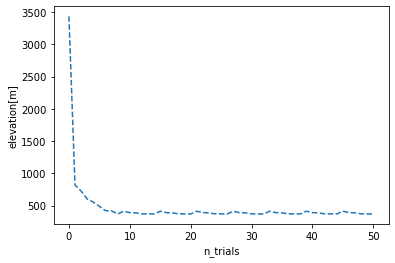

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.arange(len(descend)) , fuji[descend , 3], linestyle='dashed')
plt.xlabel("n_trials")
plt.ylabel("elevation[m]")
plt.show()

# Problem 6. Change of initial value

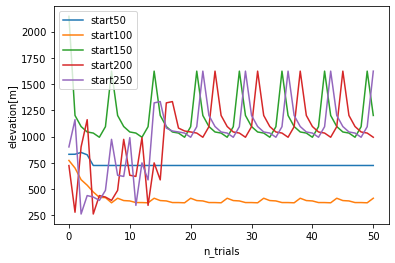

array([ 831.  ,  772.58, 2146.01,  723.66,  901.57])

In [70]:
for i in [50,100,150,200,250]:
    des = descending_func(n = i)
    plt.plot(np.arange(len(des)) , fuji[des , 3] ,label = "start{}".format(i))

plt.xlabel("n_trials")
plt.ylabel("elevation[m]")
plt.legend()
plt.show()

fuji[[50,100,150,200,250] , 3]

# Problem 7. Change Hyperparameters

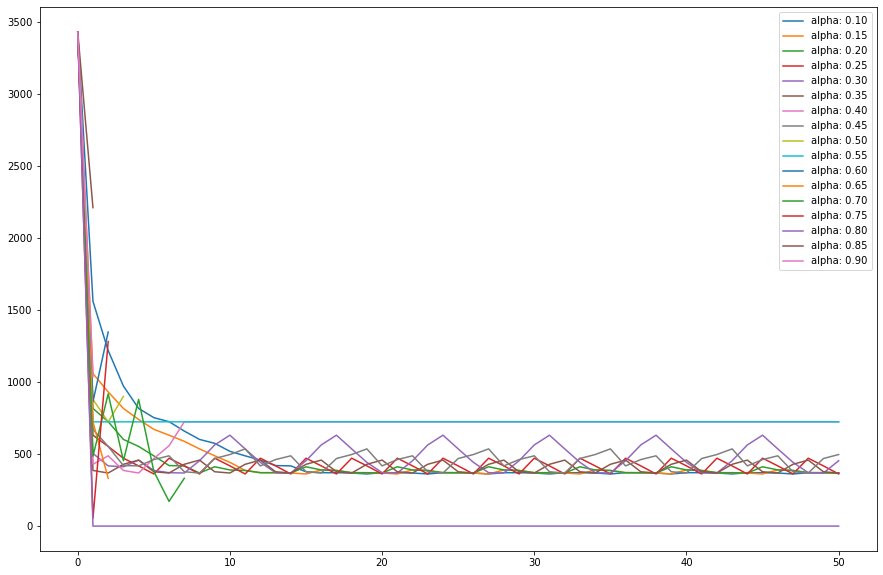

In [76]:
alpha_hp = np.arange(0.1 , 0.9 + 0.01 , 0.05)
plt.subplots(figsize = (15,10))
for i in alpha_hp:
    des = descending_func(alpha = i)
    plt.plot(np.arange(len(des)) , fuji[des ,3] , label = "alpha: {:.2f}".format(i))
    
plt.legend()
plt.show()